In [1]:
%reload_ext autoreload
%autoreload 2

import chess
from models.move_evaluation import SentimateNet
import numpy as np
from playing.testing import *
from playing.agents import *
import torch
import more_itertools
import cProfile

In [2]:
model = SentimateNet()
model.load_state_dict(torch.load("../models/Sentimate-7.11-new-representation/best.model"))
model

SentimateNet(
  (conv_layers): Sequential(
    (0): Conv2d(26, 26, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): Dropout(p=0.25, inplace=False)
    (2): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (fc_layers): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1664, out_features=500, bias=True)
    (2): ELU(alpha=1.0)
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=500, out_features=200, bias=True)
    (5): ELU(alpha=1.0)
    (6): Dropout(p=0.25, inplace=False)
    (7): Linear(in_features=200, out_features=1, bias=True)
  )
)

In [3]:
board = chess.Board("r4b1r/p1p1p1p1/Qn3nk1/1P1p3p/P2P4/2N1B3/1P2PPPq/2KR1BR1 w - - 0 16")
agent1 = MiniMaxPositionEvalAgent(3)
agent2 = MiniMaxPositionEvalModelAgent(model, 3)

In [4]:
test_agent(agent1, n_games=100)

100%|██████████| 100/100 [29:55<00:00, 17.95s/it]


{'agent_win': 100, 'opponent_win': 0, 'draw': 0}

In [5]:
test_agent(agent2, n_games=100)

100%|██████████| 100/100 [30:16<00:00, 18.16s/it]


{'agent_win': 100, 'opponent_win': 0, 'draw': 0}

In [6]:
test_agent(agent2, agent1, n_games=100)

100%|██████████| 100/100 [1:42:20<00:00, 61.41s/it]


{'agent_win': 48, 'opponent_win': 42, 'draw': 10}

In [35]:
agent = MinimaxAgent(model, 3, min_coef=1, decay=0.8)

In [6]:
agent = MinimaxAgent(model, 3, min_coef=1, decay=0.8)
board = chess.Board()

%timeit agent.play(board)

# Version with initial position being created a lot of times
# 1.57 s ± 17.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

1.57 s ± 17.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


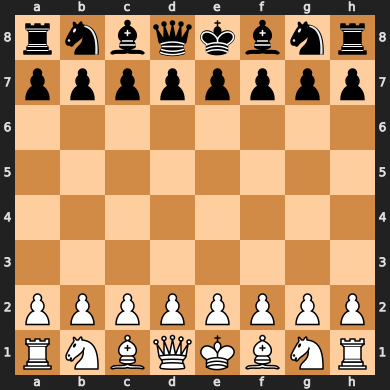

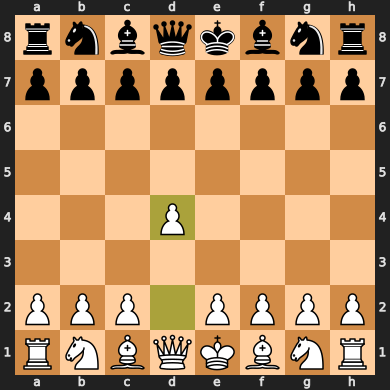

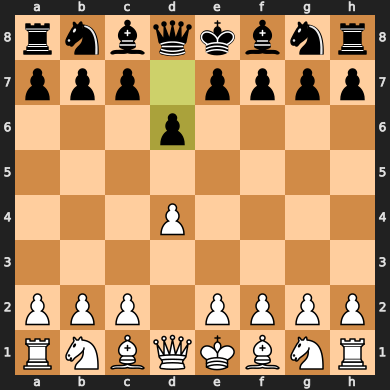

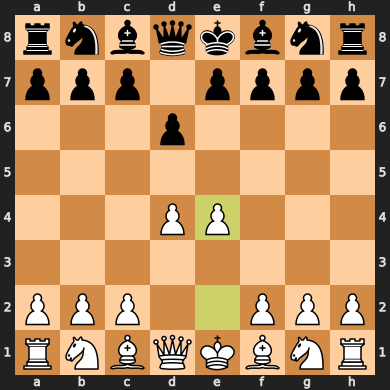

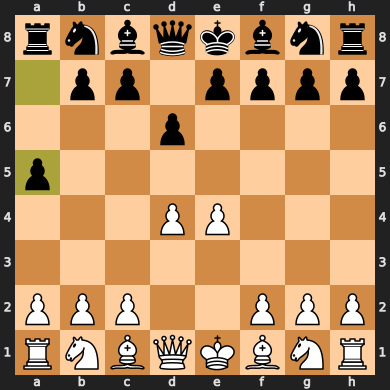

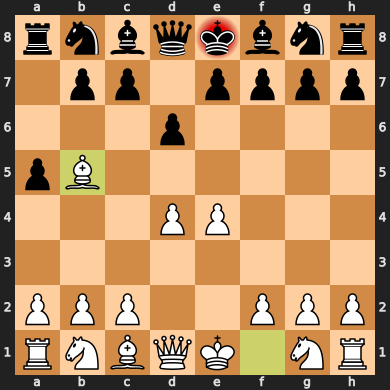

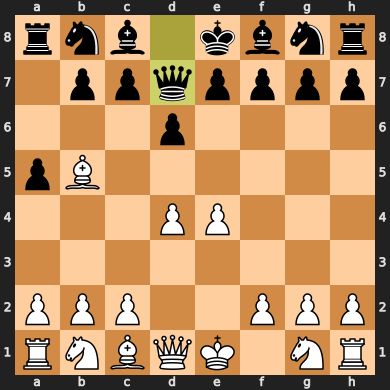

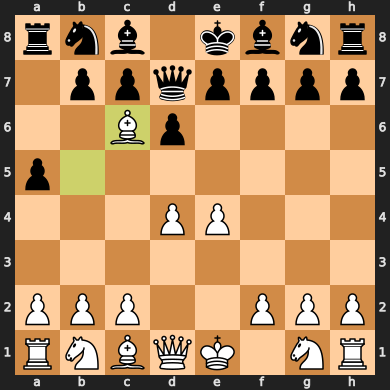

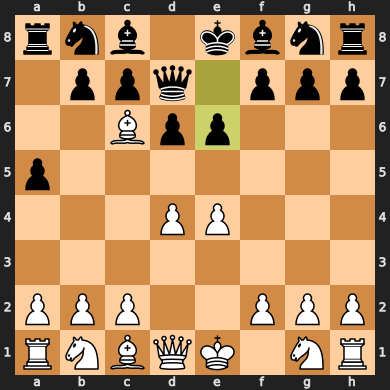

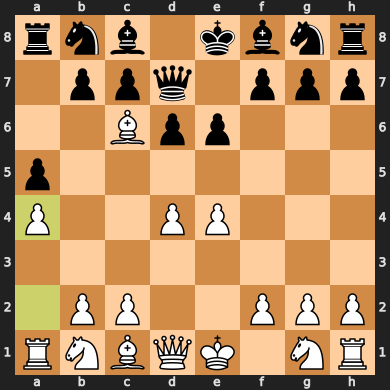

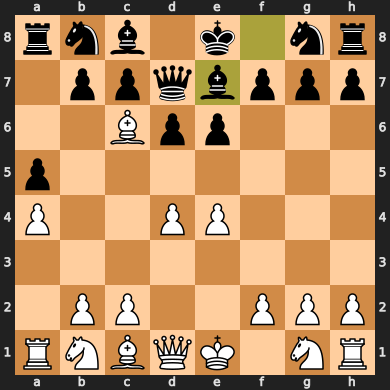

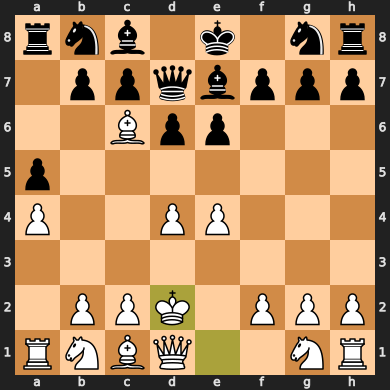

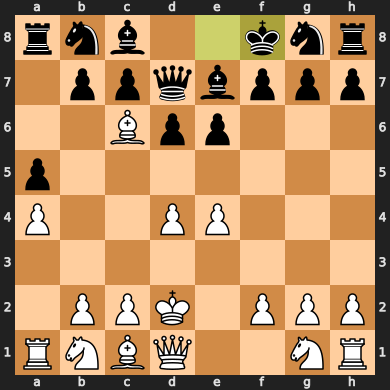

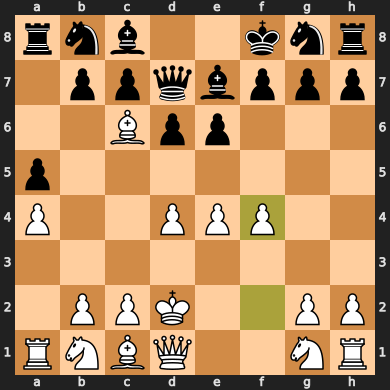

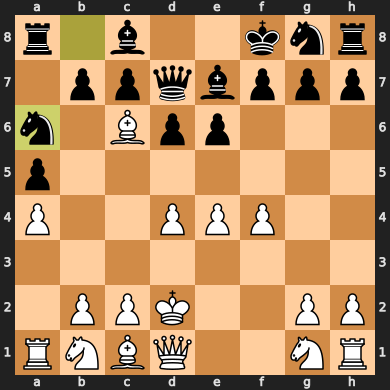

KeyboardInterrupt: 

In [58]:
play_game(agent_2, random_agent, verbose=True)

CPU times: user 5min 9s, sys: 562 ms, total: 5min 9s
Wall time: 41 s


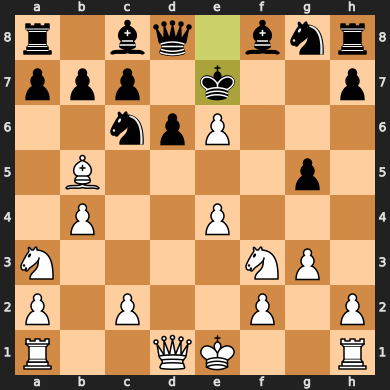

In [40]:
%time play_game(agent_2, random_agent, n_moves=10)

In [42]:
fens = ["r1b2rk1/p3qppp/2p5/5P2/1p6/1BR1P3/PP4PP/3Q1RK1 w - - 0 3", "3r1rk1/1p1b1ppp/2p2q2/p4P2/P1B5/3RP3/1PQ3PP/5RK1 w - - 5 5", "5k2/p6p/1p1p2p1/2pP1b2/2Pq4/7P/PP2Q1PK/5B2 w - - 1 8", "2rq2rk/3bbp1p/p1pppp2/8/4PP2/5B2/PPP1N1PP/R2Q1R1K b - - 1 16", "6rk/4qp1p/p2b1p2/2p2P2/8/3br1P1/PP1Q1RBP/R5NK b - - 8 27"]

In [48]:
test_agent(agent_2, n_games=10)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [28:37<00:00, 171.73s/it]


{'model_better': 9, 'random_better': 1, 'draw': 0}

In [3]:
agent = MinimaxAgent(model, 3, min_coef=1, decay=0.8)
test_agent(agent, n_games=100)

#model: 94   draw: 0   random: 6

100%|██████████| 100/100 [5:22:46<00:00, 193.67s/it] 


{'model_better': 94, 'random_better': 6, 'draw': 0}

In [5]:
test_agent(MinimaxAgent(model, 1, min_coef=1, decay=0.8), n_games=100)

#model: 90  draw: 1  random: 9

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


{'model_better': 90, 'random_better': 9, 'draw': 1}

In [6]:
test_agent(MinimaxAgent(model, 2, min_coef=1, decay=0.8), n_games=100)

#model: 89  draw: 0  random: 11

100%|██████████| 100/100 [12:04<00:00,  7.25s/it]


{'model_better': 89, 'random_better': 11, 'draw': 0}

In [14]:
test_agent(MinimaxAgent(model, 2, min_coef=1, decay=0.8), n_games=100)

#model: 89  draw: 0  random: 11

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [11:51<00:00,  7.11s/it]


{'model_better': 87, 'random_better': 12, 'draw': 1}

In [21]:
test_agent(agent)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [06:34<00:00,  7.90s/it]


{'model_better': 48, 'random_better': 1, 'draw': 1}

In [23]:
test_agent(agent, n_games=100)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [13:28<00:00,  8.08s/it]


{'model_better': 97, 'random_better': 2, 'draw': 1}

In [29]:
test_agent(agent, n_games=100)

100%|██████████| 100/100 [13:30<00:00,  8.10s/it]


{'model_better': 94, 'random_better': 5, 'draw': 1}

In [24]:
agent_2 = MinimaxAgent(model, 2, min_coef=1)
test_agent(agent_2, n_games=100)

100%|██████████| 100/100 [13:40<00:00,  8.21s/it]


{'model_better': 92, 'random_better': 7, 'draw': 1}

In [30]:
test_agent(agent_2, n_games=100)

100%|██████████| 100/100 [15:11<00:00,  9.12s/it]


{'model_better': 80, 'random_better': 17, 'draw': 3}

In [25]:
model_2 = torch.nn.Sequential(
    model,
    nn.Sigmoid()
)
model_2

Sequential(
  (0): SentimateNet(
    (conv_layers): Sequential(
      (0): Conv2d(26, 26, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): Dropout(p=0.25, inplace=False)
      (2): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (3): Flatten(start_dim=1, end_dim=-1)
    )
    (fc_layers): Sequential(
      (0): Dropout(p=0.25, inplace=False)
      (1): Linear(in_features=1664, out_features=500, bias=True)
      (2): ELU(alpha=1.0)
      (3): Dropout(p=0.25, inplace=False)
      (4): Linear(in_features=500, out_features=200, bias=True)
      (5): ELU(alpha=1.0)
      (6): Dropout(p=0.25, inplace=False)
      (7): Linear(in_features=200, out_features=1, bias=True)
    )
  )
  (1): Sigmoid()
)

In [28]:
agent_3 = MinimaxAgent(model_2, 2, min_coef=0.5)
test_agent(agent_3, n_games=100)

100%|██████████| 100/100 [16:56<00:00, 10.16s/it]


{'model_better': 73, 'random_better': 25, 'draw': 2}

In [90]:
agent = MinimaxAgent(model, 1, min_coef=1)

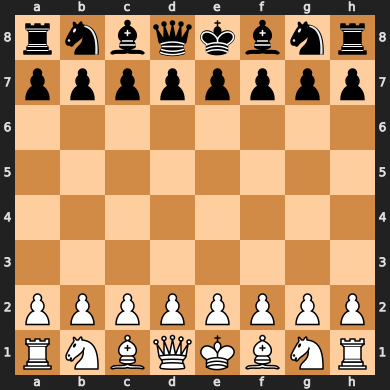

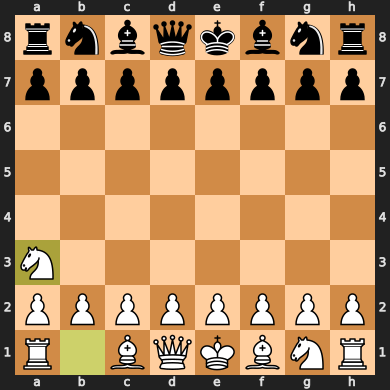

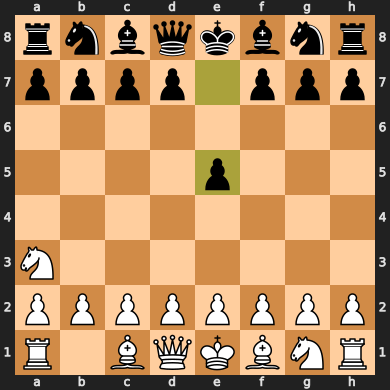

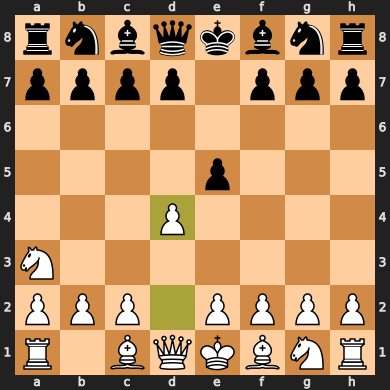

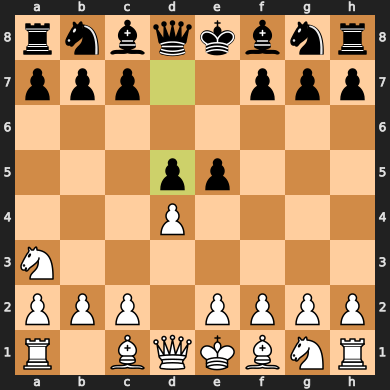

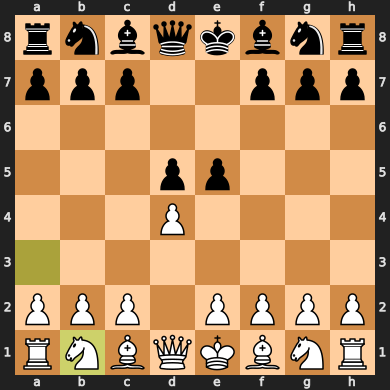

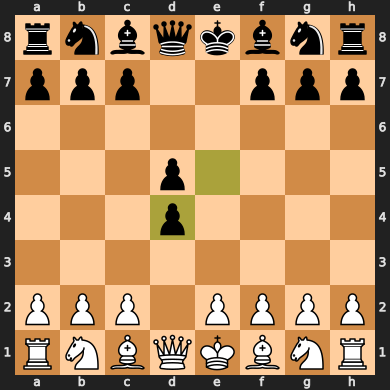

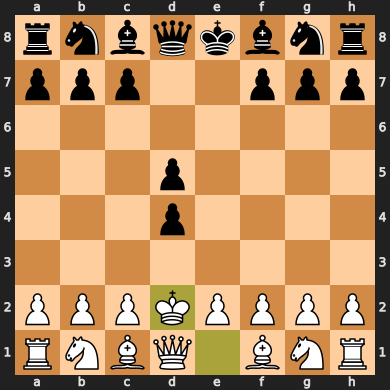

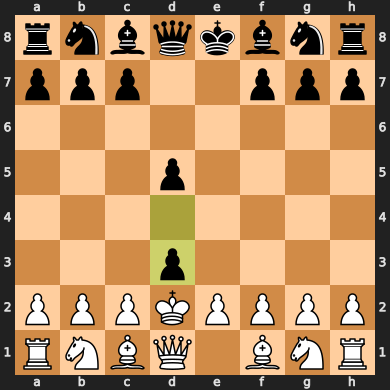

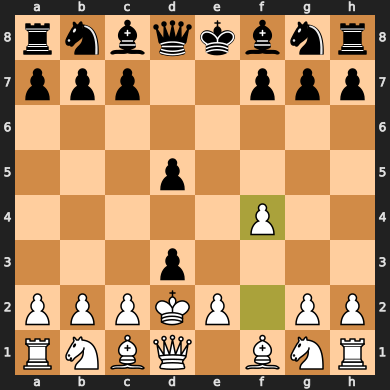

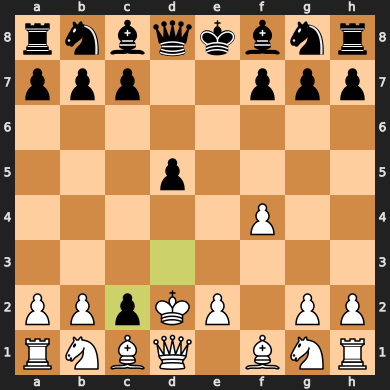

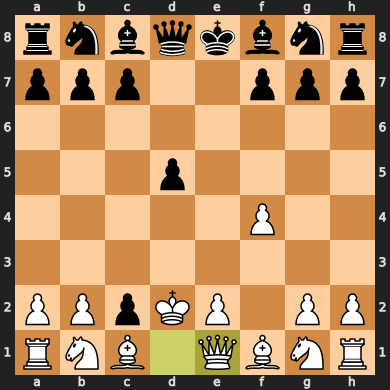

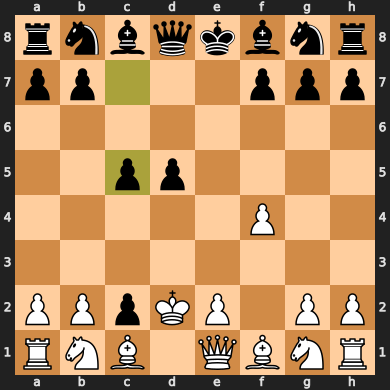

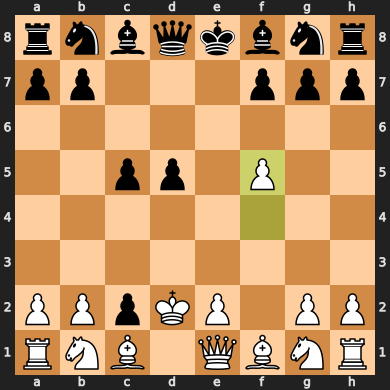

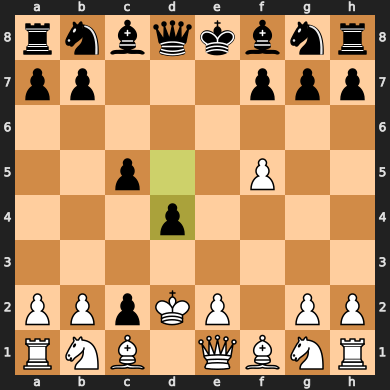

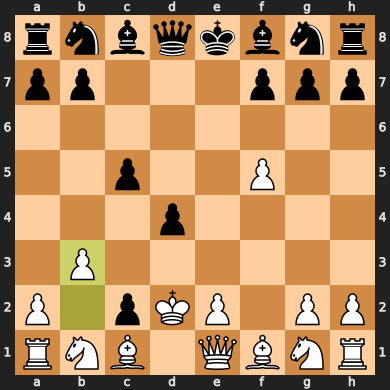

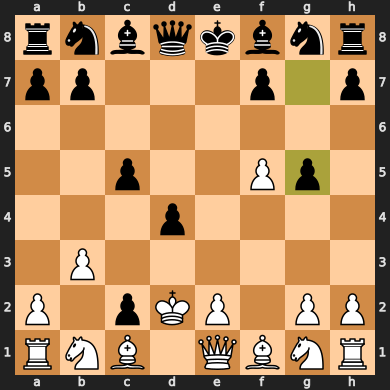

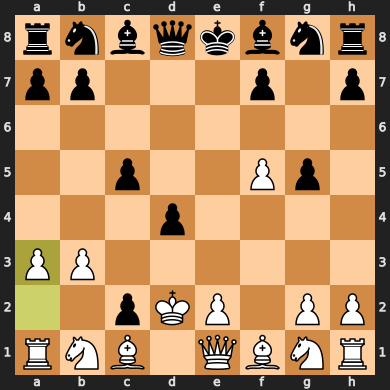

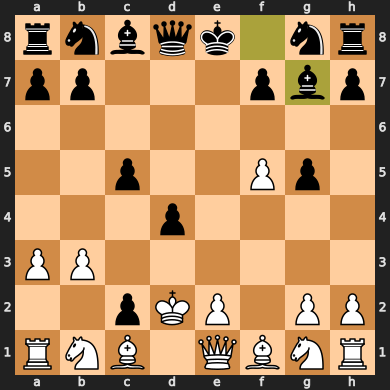

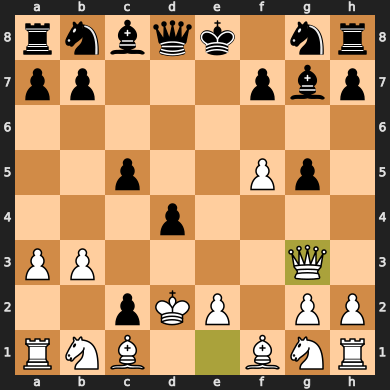

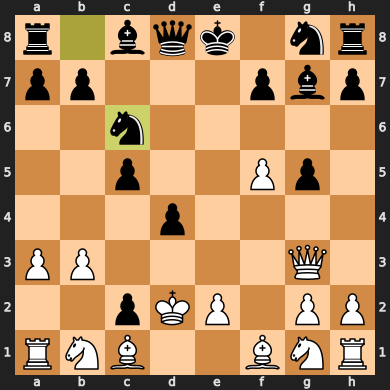

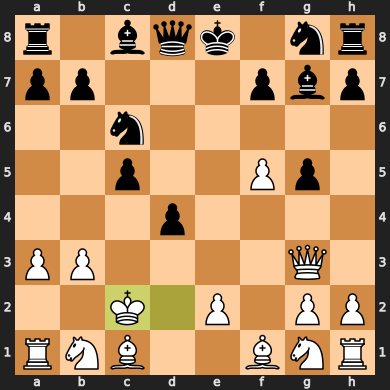

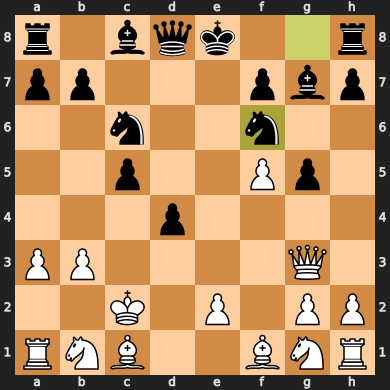

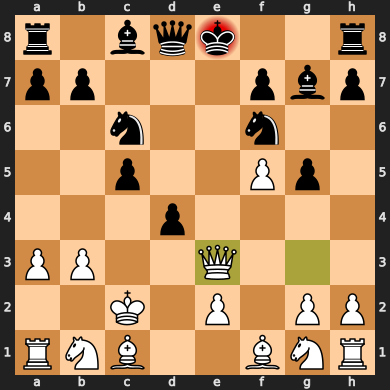

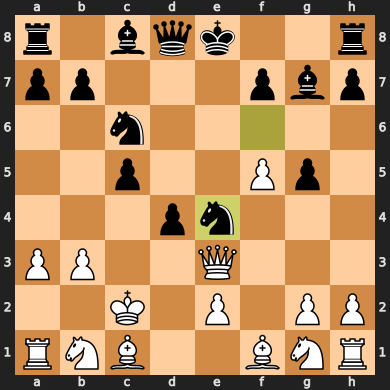

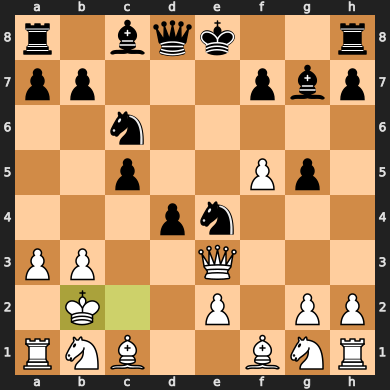

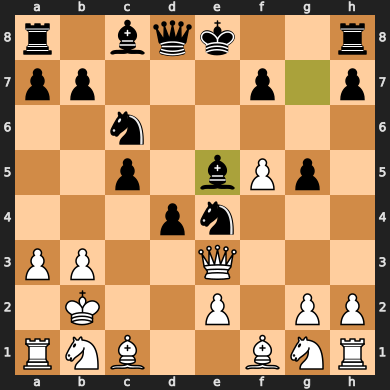

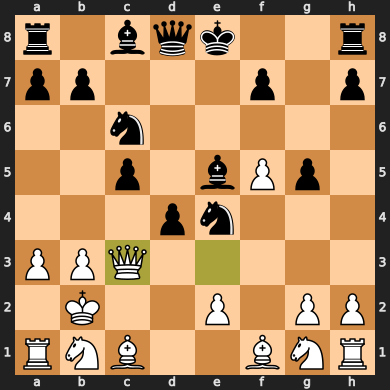

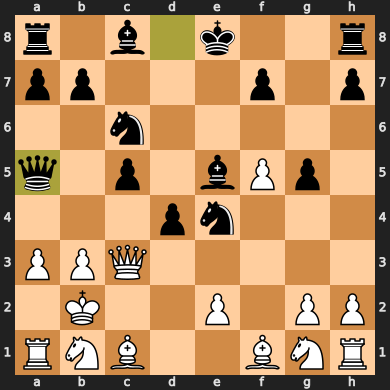

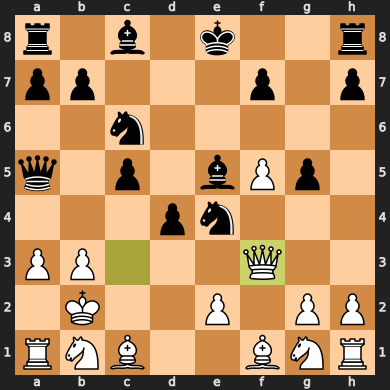

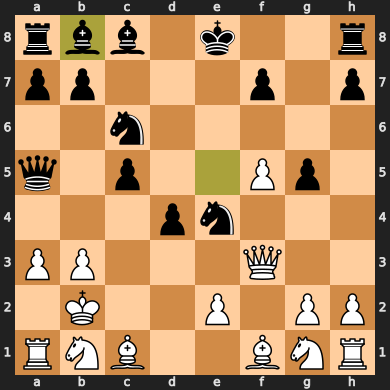

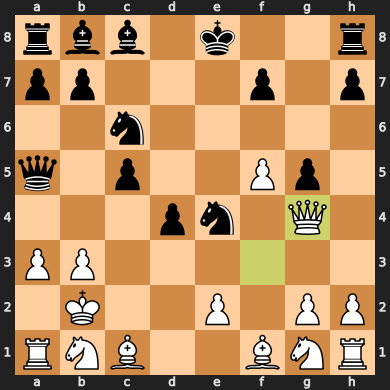

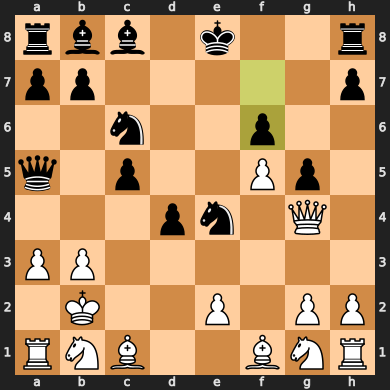

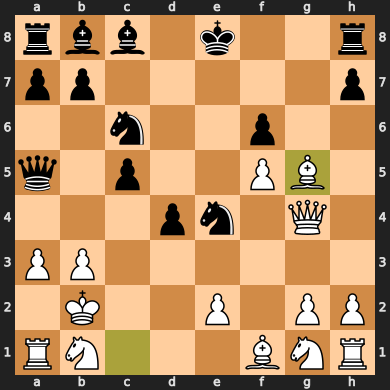

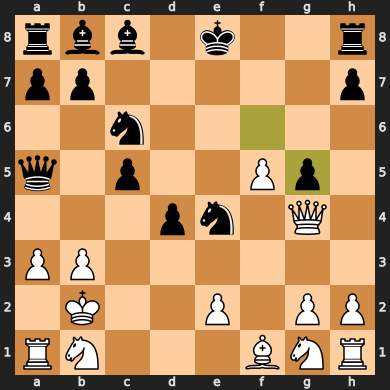

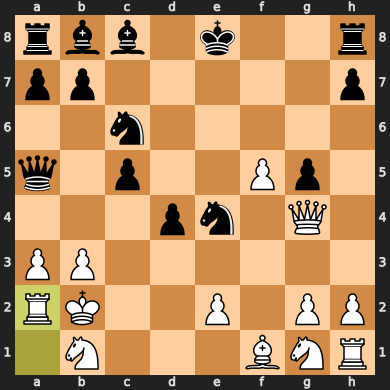

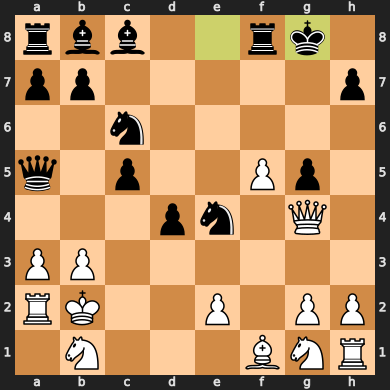

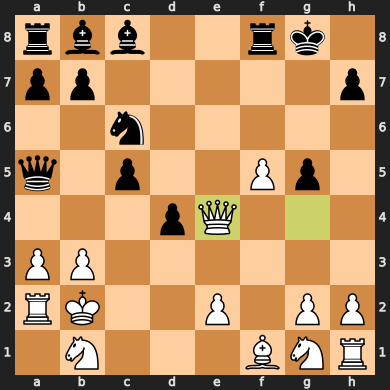

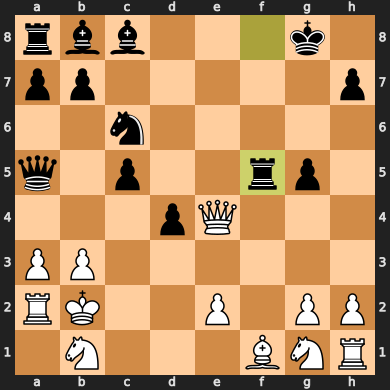

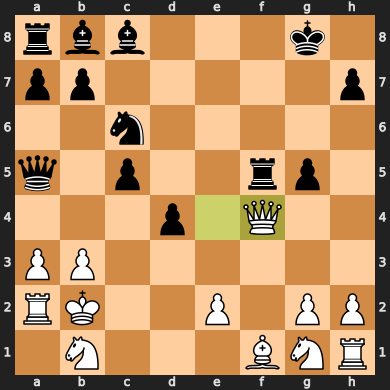

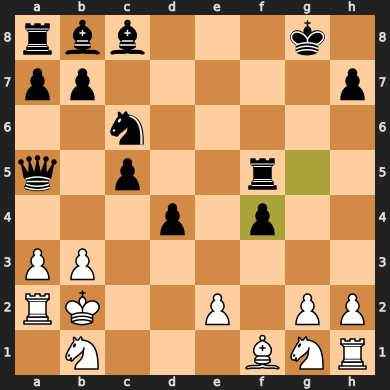

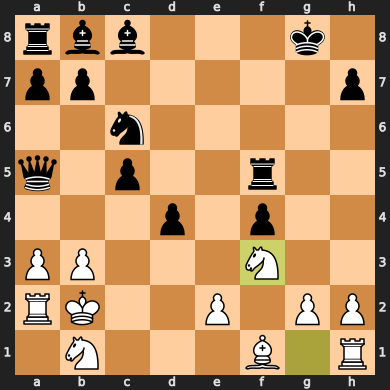

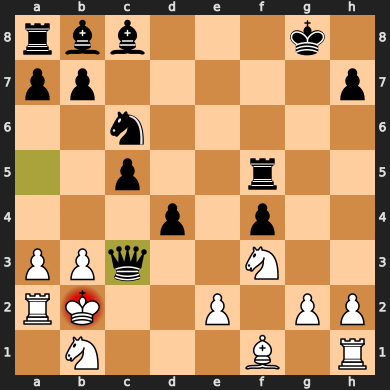

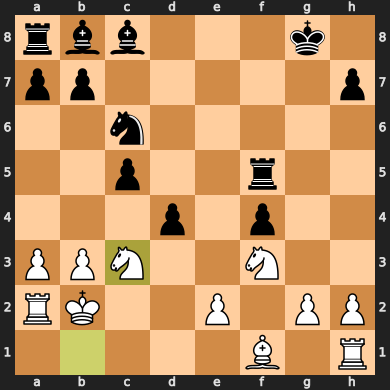

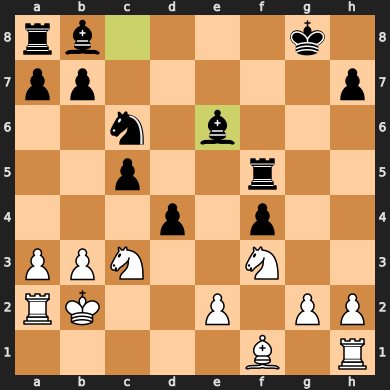

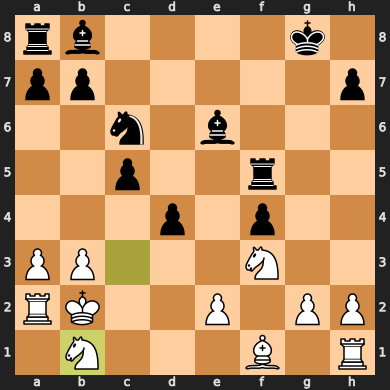

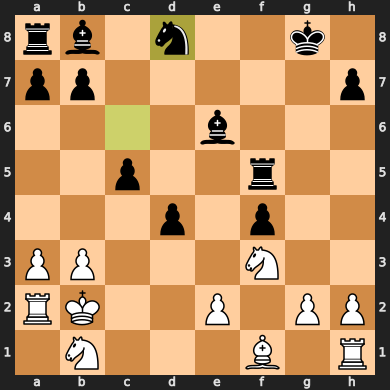

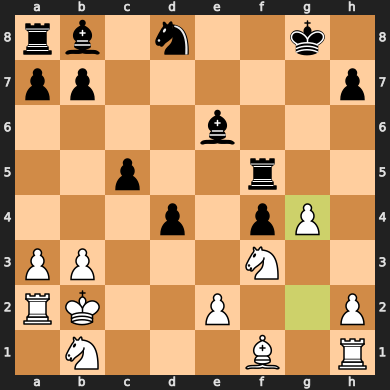

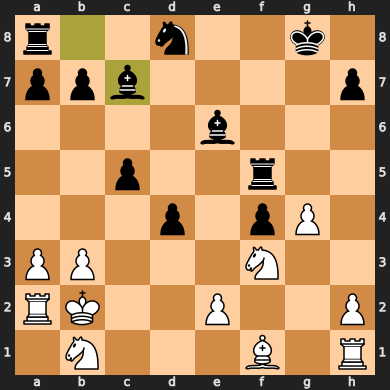

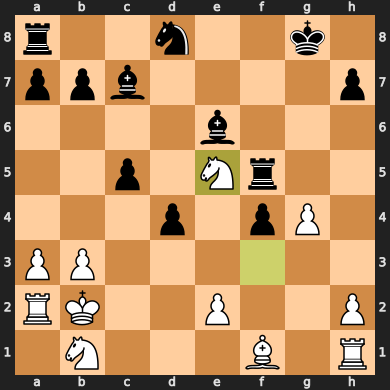

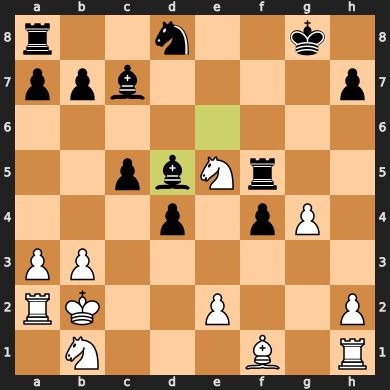

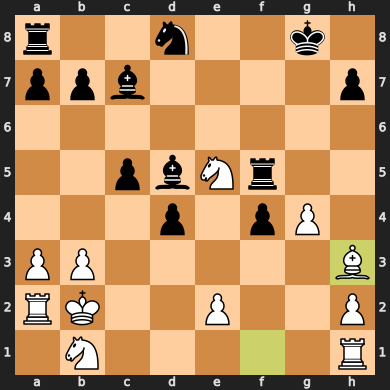

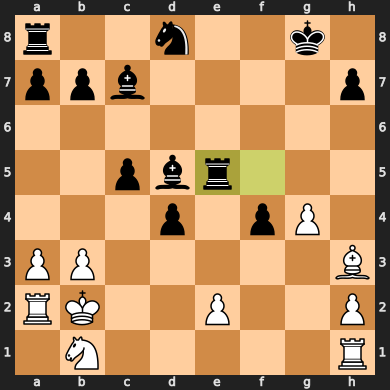

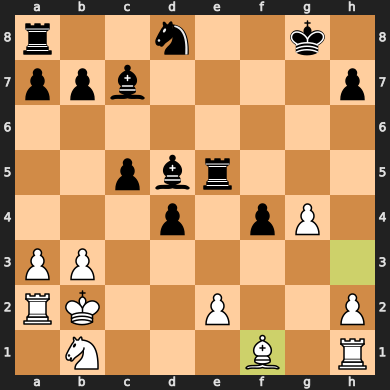

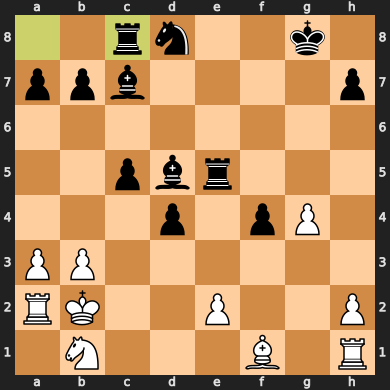

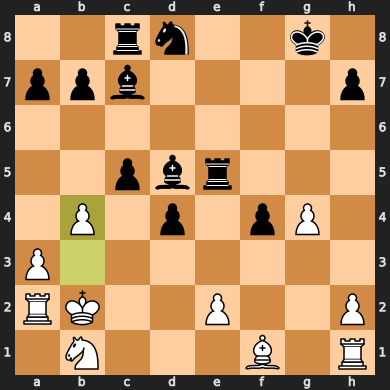

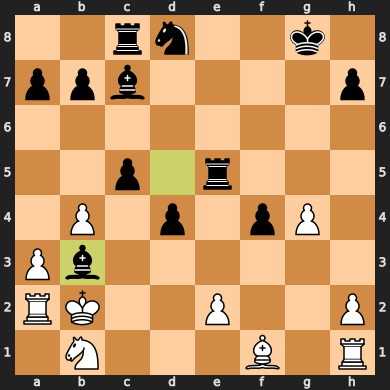

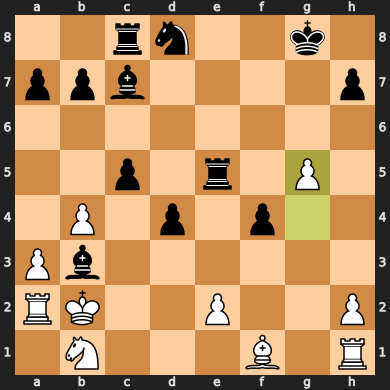

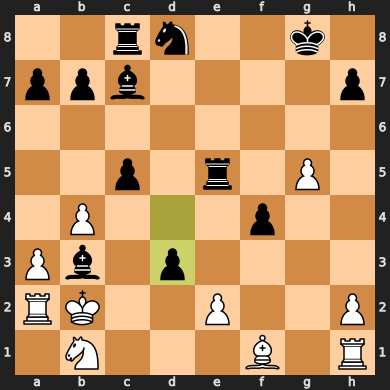

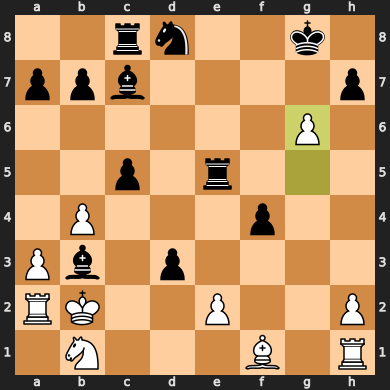

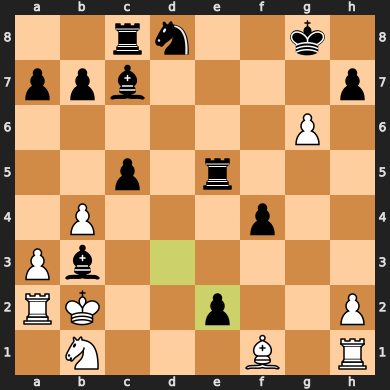

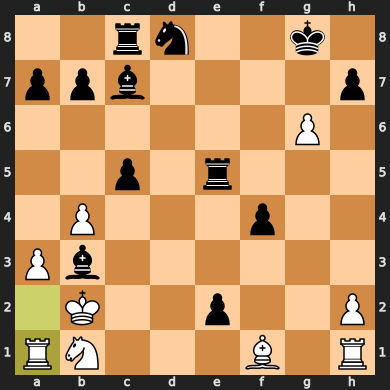

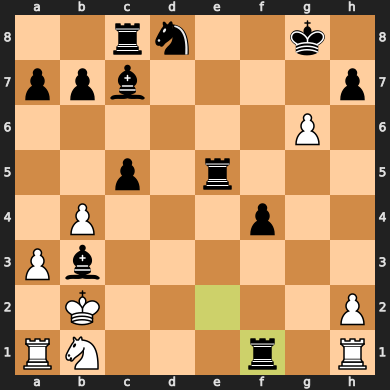

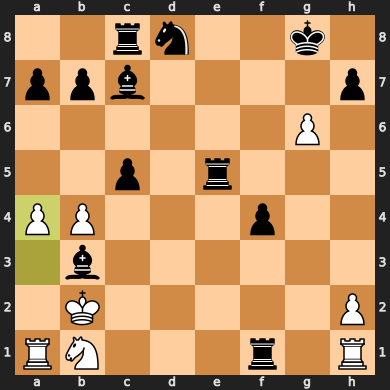

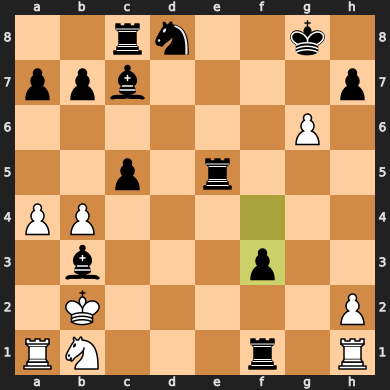

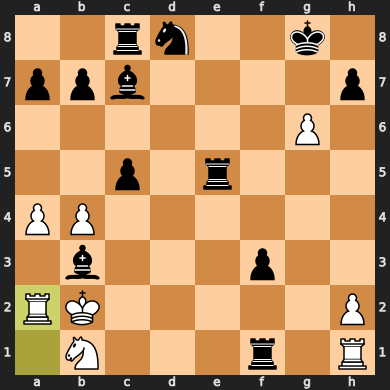

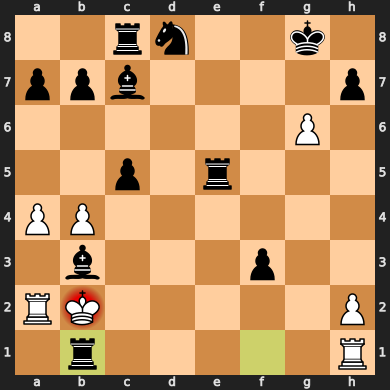

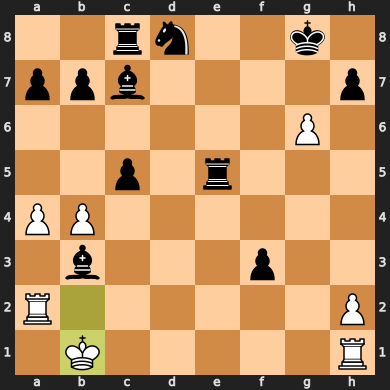

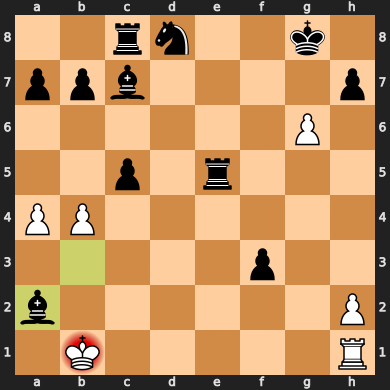

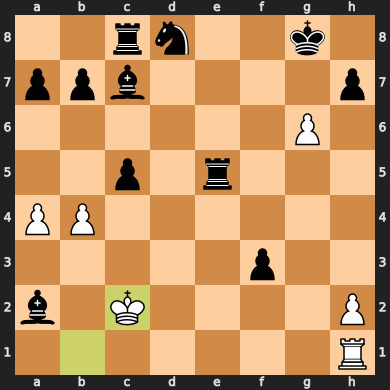

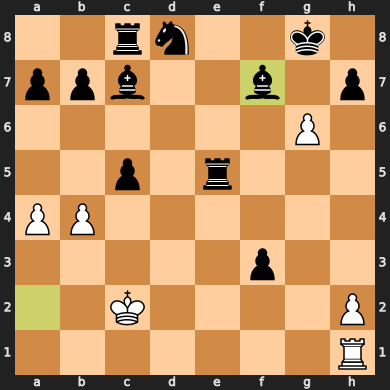

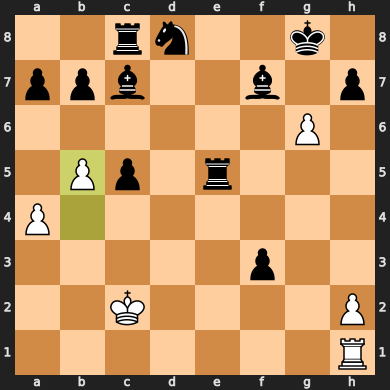

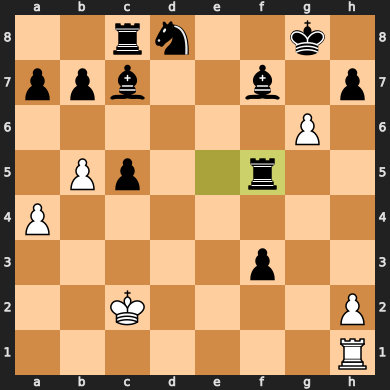

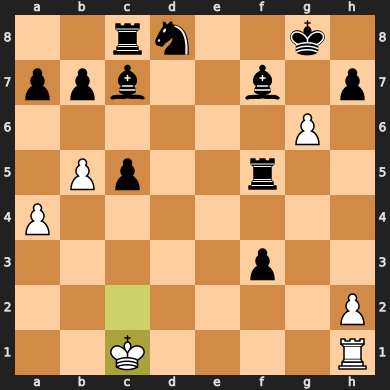

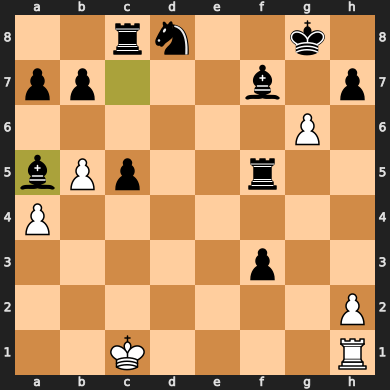

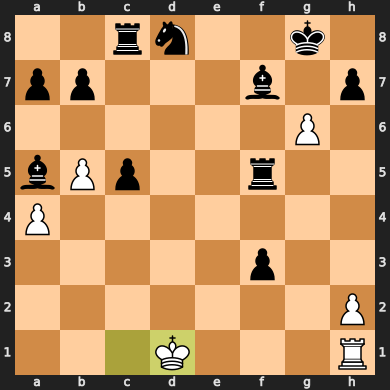

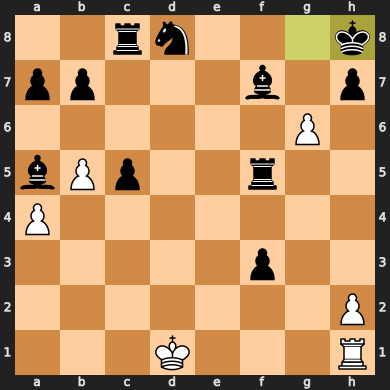

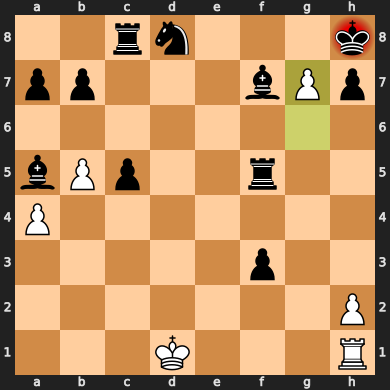

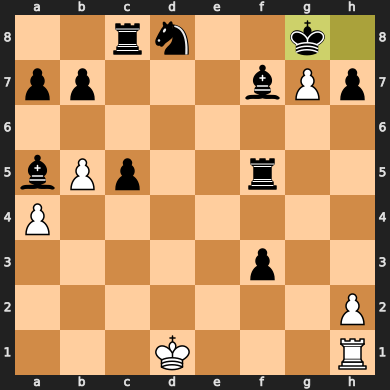

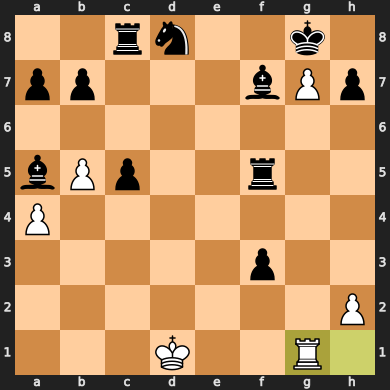

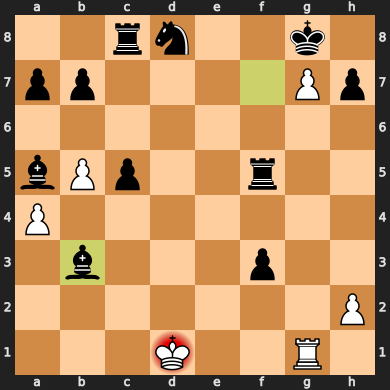

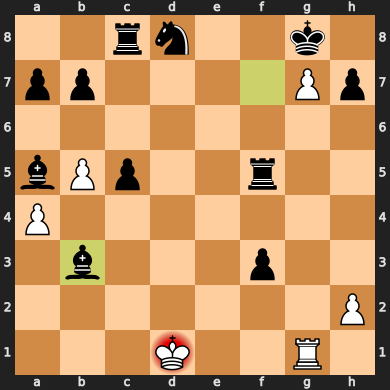

In [26]:
random_agent = RandomAgent()
agent = MinimaxAgent(model, 1, decay=1, min_coef=1)
play_game(random_agent, agent, verbose=True, n_moves=40)